# Handwritte Digit Recogonition

Importing Dataset

In [1]:
from sklearn.datasets import fetch_openml
mnist=fetch_openml('mnist_784')

In [2]:
x,y=mnist['data'],mnist['target']

In [14]:
print(x.shape)
print(y.shape)

(70000, 784)
(70000,)


In [16]:
%matplotlib inline
import matplotlib
from matplotlib import pyplot as plt

In [39]:
n=int(input("Enter Datapoint To be Detected"))
some_digit=x[n]                   #importing pixels from data since have pixel's data. It will import 6000's image's pixel.
some_digit_image=some_digit.reshape(28,28)                                       # Reshaping pixels to form image (28*28 pixels)

Enter Datapoint To be Detected2001


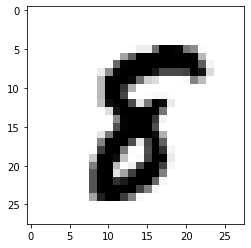

In [40]:
plt.imshow(some_digit_image,cmap=matplotlib.cm.binary,interpolation='nearest')
plt.show()

In [42]:
print(f"Actual Data Point at {n} : {y[n]}")

Actual Data Point at 2001 : 8


In [43]:
# MNIST dataset is already is splitted. So All we have to do is plug & play.
x_train,x_test,y_train,y_test=x[:60000],x[60000:],y[:60000],y[60000:]

In [44]:
import numpy as np
shuffle_index=np.random.permutation(60000)
x_train,y_train=x_train[shuffle_index],y_train[shuffle_index]

# Creating Detectors

In [45]:
y_train=y_train.astype(np.int8) #It will convert string array to integer type array.
y_test=y_test.astype(np.int8)

actual_train_detector=[]
actual_test_detector=[]

for i in range(0,10):
    train_detector=(y_train==i)
    test_detector=(y_test==i)
    actual_train_detector.append(train_detector)
    actual_test_detector.append(test_detector)
    
#y_train_2=(y_train==2)
#y_test_2=(y_test==2)

print(actual_train_detector)
print(actual_test_detector)

[array([False, False, False, ..., False, False, False]), array([False, False, False, ..., False, False, False]), array([False, False,  True, ..., False, False, False]), array([False,  True, False, ..., False, False, False]), array([False, False, False, ..., False,  True, False]), array([False, False, False, ...,  True, False,  True]), array([False, False, False, ..., False, False, False]), array([False, False, False, ..., False, False, False]), array([ True, False, False, ..., False, False, False]), array([False, False, False, ..., False, False, False])]
[array([False, False, False, ..., False, False, False]), array([False, False,  True, ..., False, False, False]), array([False,  True, False, ..., False, False, False]), array([False, False, False, ..., False, False, False]), array([False, False, False, ...,  True, False, False]), array([False, False, False, ..., False,  True, False]), array([False, False, False, ..., False, False,  True]), array([ True, False, False, ..., False, False,

In [52]:
from sklearn.linear_model import LogisticRegression
#clf=LogisticRegression(tol=0.2)
classifiers=[]
fitt=[]
for j in range(0,10):
    clf=LogisticRegression(tol=0.2)
    classifiers.append(clf)

for k in range(0,10):
    z=classifiers[k].fit(x_train,actual_train_detector[k])
    fitt.append(z)

C:\Users\sandh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\sandh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [60]:
results=[]

clf.predict([some_digit])
for q in range(0,10):
    clf_result=classifiers[q].predict([some_digit])
    results.append(clf_result)

actual_result=-1

for rs in range(0,10):
    if results[rs]==True:
        actual_result=rs
        print(f"Image at Selected Data Point is of : {actual_result}")


Image at Selected Data Point is of : 8


In [57]:
from sklearn.model_selection import cross_val_score
accuracy_result=[]
for acc in range(0,10):
    a=cross_val_score(clf,x_train,actual_train_detector[acc],cv=3,scoring='accuracy')
    accuracy_result.append(a)
    
#a=cross_val_score(clf,x_train,y_train_2,cv=3,scoring='accuracy')

C:\Users\sandh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\sandh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\sandh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\sandh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [65]:
print(f"Accuracy While Finding the result is : {accuracy_result[actual_result].mean()}")

Accuracy While Finding the result is : 0.9470833333333334
